<a href="https://colab.research.google.com/github/bootstrap666/semantic_segmentation_demo/blob/main/use_trained_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive/People Clothing Segmentation'

Mounted at /content/drive
/content/drive/MyDrive/People Clothing Segmentation


In [2]:
# for path related functionalities
import os
# for array operations
import numpy as np
# tensorflow framework
import tensorflow as tf
# keras API for deep learning
from tensorflow import keras
# for image visulaizations
import matplotlib.pyplot as plt
# for legends and other supporting functionalities
import matplotlib as mpl
# for viewing iteration status
from tqdm import tqdm

In [3]:
#from keras.models import model_from_json

#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#unet = model_from_json(loaded_model_json)
## load weights into new model
#unet.load_weights("model.h5")
#print("Loaded model from disk")
unet = keras.models.load_model('keras_unet_model')

File ‘Joss-Camiseta-Joss-Basica-Lisa-Preto-4912-7492839-1-zoom.jpg’ already there; not retrieving.



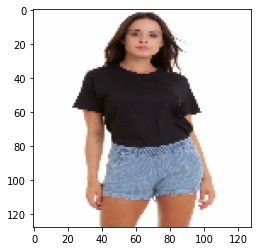

In [14]:
!wget -nc https://static.dafiti.com.br/p/Joss-Camiseta-Joss-Basica-Lisa-Preto-4912-7492839-1-zoom.jpg

file = tf.io.read_file('Joss-Camiseta-Joss-Basica-Lisa-Preto-4912-7492839-1-zoom.jpg')

# decode jpg file into a tensor
image = tf.image.decode_jpeg(file,channels=3)
image = tf.cast(image, tf.float32)
image = image/255.0
# resize image
image = tf.image.resize(image, (128,128))
plt.imshow(image)

##Gambiarra porque a rede pede uma lista de imagens como entrada
images = []

images.append(image)
#
img = tf.convert_to_tensor(images)
#print(np.shape(images))
#
##temp = images[0]
##np.shape(temp)

#print(unet.summary())


#for i in pred:
#    # plot the predicted mask
#    i = tf.argmax(i, axis=-1)
#    plt.imshow(i,cmap='jet', norm=NORM)
#    plt.axis('off')
#    plt.title('Prediction')

In [16]:
#image = tf.image.decode_jpeg(file,channels=3)

pred = unet.predict(img)


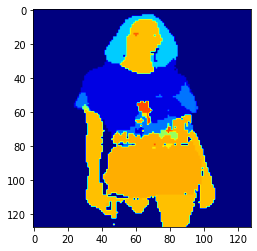

In [26]:
NORM = mpl.colors.Normalize(vmin=0, vmax=58)
for i in pred:
  image = tf.argmax(i, axis=-1)
  plt.imshow(image,cmap='jet', norm=NORM)